# Retrieval of data to put in the manuscript text/tables

In [1]:
import pathlib
import numpy as np
import pandas as pd
import geopandas as gpd
# Location of reemission outputs
outputs = pathlib.Path("outputs/reemission/outputs_MIN_LOW_PRIM.xlsx")
reemission_inputs = pd.read_excel(outputs,'inputs')
reemission_outputs = pd.read_excel(outputs,'outputs')
reemission_outputs['total_net'] = reemission_outputs['co2_net'] + reemission_outputs['ch4_net']
hp_inputs = reemission_inputs.query('type=="hydroelectric"')
irr_inputs = reemission_inputs.query('type=="irrigation"')
hp_names = hp_inputs['Name'].to_list()
irr_names = irr_inputs['Name'].to_list()
hp_mask = reemission_outputs['Name'].isin(hp_names)
irr_mask = reemission_outputs['Name'].isin(irr_names)
hp_outputs = reemission_outputs[hp_mask]
irr_outputs = reemission_outputs[irr_mask]
# MOO inputs
moo_inputs_path = pathlib.Path("outputs/moo/all_hp.csv")
# SHAPE WITH EMISSION INTENSITIES
shp_path = pathlib.Path("intermediate/out_par_em_ifc.shp")

In [3]:
reemission_outputs.head()

,Name,co2_diffusion,co2_diffusion_nonanthro,co2_preimp,co2_minus_nonanthro,co2_net,co2_total_per_year,co2_total_lifetime,co2_profile_0,co2_profile_1,...,n2o_profile_1,n2o_profile_2,n2o_profile_3,n2o_profile_4,n2o_profile_5,n2o_profile_6,n2o_profile_7,n2o_profile_8,n2o_profile_9,total_net
0,Bawgata,554.2396,380.3627,-498.96,173.8769,672.8369,6759.3197,675.9320,1857.1903,1140.8019,...,2.3092,2.3092,2.3092,2.3092,2.3092,2.3092,2.3092,2.3092,2.3092,917.3691
1,Belin,594.1059,407.7220,-61.60,186.3838,247.9838,81766.9606,8176.6961,1517.5272,749.6093,...,0.6609,0.6609,0.6609,0.6609,0.6609,0.6609,0.6609,0.6609,0.6609,645.9976
2,Buywa (upper),532.1946,365.2337,-229.02,166.9609,395.9809,26236.5086,2623.6509,1533.2264,845.3325,...,0.0241,0.0241,0.0241,0.0241,0.0241,0.0241,0.0241,0.0241,0.0241,729.0018
3,Buywa,620.2930,425.6937,-139.59,194.5993,334.1893,11664.5432,1166.4543,1659.6920,857.9256,...,0.0146,0.0146,0.0146,0.0146,0.0146,0.0146,0.0146,0.0146,0.0146,1170.1472
4,Dum Ban,458.5159,314.6696,-48.51,143.8463,192.3563,587.2638,58.7264,1172.1579,579.4982,...,0.0558,0.0558,0.0558,0.0558,0.0558,0.0558,0.0558,0.0558,0.0558,556.6300


In [2]:
reemission_outputs['total_net'].describe()

count      211.000000
mean      2057.155666
std       1324.268679
min        362.615700
25%       1264.203950
50%       1855.637400
75%       2602.980150
max      14275.420200
Name: total_net, dtype: float64

## Data needed for the Results section, aerial emission rates

In [54]:
reemission_outputs.columns

Index(['Name', 'co2_diffusion', 'co2_diffusion_nonanthro', 'co2_preimp',
       'co2_minus_nonanthro', 'co2_net', 'co2_total_per_year',
       'co2_total_lifetime', 'co2_profile_0', 'co2_profile_1', 'co2_profile_2',
       'co2_profile_3', 'co2_profile_4', 'co2_profile_5', 'co2_profile_6',
       'co2_profile_7', 'co2_profile_8', 'co2_profile_9', 'ch4_diffusion',
       'ch4_ebullition', 'ch4_degassing', 'ch4_preimp', 'ch4_net',
       'ch4_total_per_year', 'ch4_total_lifetime', 'ch4_profile_0',
       'ch4_profile_1', 'ch4_profile_2', 'ch4_profile_3', 'ch4_profile_4',
       'ch4_profile_5', 'ch4_profile_6', 'ch4_profile_7', 'ch4_profile_8',
       'ch4_profile_9', 'n2o_methodA', 'n2o_methodB', 'n2o_mean',
       'n2o_total_per_year', 'n2o_total_lifetime', 'n2o_profile_0',
       'n2o_profile_1', 'n2o_profile_2', 'n2o_profile_3', 'n2o_profile_4',
       'n2o_profile_5', 'n2o_profile_6', 'n2o_profile_7', 'n2o_profile_8',
       'n2o_profile_9', 'total_net'],
      dtype='object')

In [32]:
reemission_inputs.head()

,Name,coordinates_0,coordinates_1,id,type,monthly_temps_0,monthly_temps_1,monthly_temps_2,monthly_temps_3,monthly_temps_4,...,res_area_fractions_23,res_area_fractions_24,res_area_fractions_25,res_area_fractions_26,res_soil_carbon,res_mean_radiance,res_mean_radiance_may_sept,res_mean_radiance_nov_mar,res_mean_monthly_windspeed,res_water_intake_depth
0,Bawgata,18.2689,96.8598,8,hydroelectric,21.2,23.1,25.9,28.4,27.8,...,0.0,0.0,0.0,0,5.744,5.030,4.340,5.458,0.97,NaN
1,Belin,17.5197,97.2435,9,hydroelectric,22.4,24.1,27.0,29.6,28.9,...,0.0,0.0,0.0,0,6.062,4.870,3.995,5.459,1.05,NaN
2,Buywa (upper),20.7661,94.0818,10,multipurpose,18.5,21.3,25.5,28.3,28.0,...,0.0,0.0,0.0,0,5.701,4.785,4.126,5.202,1.09,NaN
3,Buywa,20.6566,94.1430,11,multipurpose,19.9,22.6,26.8,29.6,29.3,...,0.0,0.0,0.0,0,5.240,4.850,4.300,5.188,1.03,NaN
4,Dum Ban,25.5116,97.9070,21,hydroelectric,15.0,16.8,20.5,23.2,25.2,...,0.0,0.0,0.0,0,6.871,4.430,3.968,4.680,1.04,NaN


## Hydroelectric reservoirs

In [18]:
# Areas in km2
hp_inputs['res_area'].describe()

count     42.000000
mean      99.424690
std      178.331981
min        3.053000
25%       14.021500
50%       29.207000
75%       72.109250
max      852.695000
Name: res_area, dtype: float64

In [28]:
# Provide volumes in km3
(hp_inputs['res_volume']/1e9).describe()

count    42.000000
mean      4.351528
std      10.007996
min       0.104418
25%       0.330324
50%       0.958308
75%       2.316516
max      56.905073
Name: res_volume, dtype: float64

In [24]:
hp_inputs['res_mean_depth'].describe()

count    42.000000
mean     34.897619
std      17.846069
min      13.900000
25%      20.100000
50%      32.400000
75%      44.075000
max      85.100000
Name: res_mean_depth, dtype: float64

In [51]:
hp_outputs['co2_net'].describe()

count     42.000000
mean     337.710164
std      109.370700
min       56.626700
25%      267.064075
50%      329.044050
75%      413.046575
max      672.836900
Name: co2_net, dtype: float64

In [55]:
hp_outputs['ch4_net'].describe()

count      42.000000
mean      766.835671
std       593.833709
min       111.729800
25%       377.501775
50%       634.400150
75%       986.644750
max      3135.887300
Name: ch4_net, dtype: float64

In [58]:
hp_outputs['total_net'].describe()

count      42.000000
mean     1104.545836
std       593.577183
min       362.615700
25%       690.616150
50%       953.777850
75%      1314.597875
max      3570.774300
Name: total_net, dtype: float64

## Irrigation reservoirs

In [59]:
irr_inputs['res_area'].describe()

count    153.000000
mean       7.701732
std       18.434726
min        0.208000
25%        1.482000
50%        3.644000
75%        7.764000
max      210.035000
Name: res_area, dtype: float64

In [73]:
# sorted(irr_inputs['res_area'].to_list())
irr_inputs['res_mean_depth'].describe()

count    153.000000
mean       6.450161
std        3.991689
min        0.400000
25%        3.962500
50%        5.800000
75%        7.700000
max       24.000000
Name: res_mean_depth, dtype: float64

In [77]:
irr_outputs['total_net'].describe()

count      153.000000
mean      2355.759333
std       1385.913709
min        386.410100
25%       1531.329900
50%       2115.099200
75%       2840.441500
max      14275.420200
Name: total_net, dtype: float64

In [76]:
irr_outputs['co2_net'].describe()

count    153.000000
mean     377.768789
std       78.504531
min      155.764700
25%      329.369400
50%      376.104300
75%      422.009700
max      670.922400
Name: co2_net, dtype: float64

In [78]:
irr_outputs['ch4_net'].describe()

count      153.000000
mean      1977.990544
std       1390.006329
min         31.398100
25%       1180.127400
50%       1748.277000
75%       2464.064900
max      14029.034800
Name: ch4_net, dtype: float64

<Axes: >

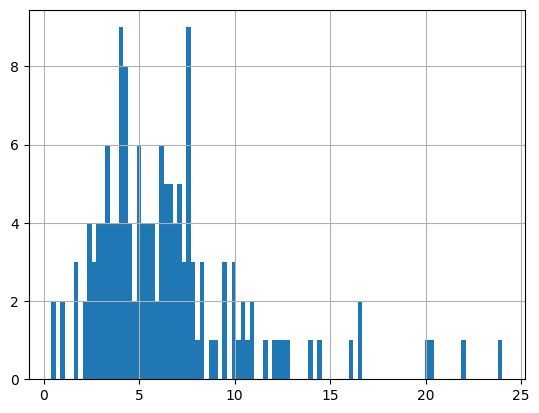

In [74]:
irr_inputs['res_mean_depth'].hist(bins=100)

## Data needed for the Emission intensities of existing and planned hydropower section

In [82]:
moo_inputs = pd.read_csv(moo_inputs_path)
# units:
# HP_mean in MW
# tot_em in tonnesCO2/anum
# em_intensity in gCO2/kWh 

em_intensity = tot_em * 1000000 / (HP * 24 * 365.25 * 1000) 

In [83]:
moo_inputs.head()

,Unnamed: 0,ifc_id,name,type,status,hp_type_ifc,hp_type_reem,HP_mean,HP_firm,tot_em,urban_area_loss_km2,forest_area_loss_km2,crop_area_loss_km2,flooded_villages,status_int
0,0,7,Baluchaung (upper),hydroelectric,Future,RoR,ror,15.0,0.0,394.4700,0.0,0.000000,0.0,0.0,0
1,1,2,Baluchaung 1,hydroelectric,Existing,RoR,ror,22.0,22.0,578.5560,0.0,0.000000,0.0,0.0,1
2,2,4,Baluchaung 2,hydroelectric,Existing,RoR,ror,134.0,134.0,3523.9320,0.0,0.000000,0.0,0.0,1
3,3,6,Baluchaung 3,hydroelectric,Existing,RoR,ror,42.0,42.0,1104.5160,0.0,0.000000,0.0,0.0,1
4,4,8,Bawgata,hydroelectric,Future,S,sto,36.0,3.0,9215.8903,0.0,9.764712,0.0,0.0,0


In [145]:
moo_inputs.query('status == "Future" and hp_type_ifc == "RoR"').count()

Unnamed: 0              42
ifc_id                  42
name                    42
type                    42
status                  42
hp_type_ifc             42
hp_type_reem            42
HP_mean                 42
HP_firm                 42
tot_em                  42
urban_area_loss_km2     42
forest_area_loss_km2    42
crop_area_loss_km2      42
flooded_villages        42
status_int              42
em_intensity            42
dtype: int64

In [144]:
moo_inputs.query('status == "Existing" and hp_type_ifc == "RoR"').count()

Unnamed: 0              11
ifc_id                  11
name                    11
type                    11
status                  11
hp_type_ifc             11
hp_type_reem            11
HP_mean                 11
HP_firm                 11
tot_em                  11
urban_area_loss_km2     11
forest_area_loss_km2    11
crop_area_loss_km2      11
flooded_villages        11
status_int              11
em_intensity            11
dtype: int64

In [89]:
moo_inputs.query('type == "hydroelectric" and status == "Existing" and hp_type_ifc == "S"').count()

Unnamed: 0              6
ifc_id                  6
name                    6
type                    6
status                  6
hp_type_ifc             6
hp_type_reem            6
HP_mean                 6
HP_firm                 6
tot_em                  6
urban_area_loss_km2     6
forest_area_loss_km2    6
crop_area_loss_km2      6
flooded_villages        6
status_int              6
dtype: int64

In [90]:
moo_inputs.query('type == "multipurpose" and status == "Existing" and hp_type_ifc == "S"').count()

Unnamed: 0              12
ifc_id                  12
name                    12
type                    12
status                  12
hp_type_ifc             12
hp_type_reem            12
HP_mean                 12
HP_firm                 12
tot_em                  12
urban_area_loss_km2     12
forest_area_loss_km2    12
crop_area_loss_km2      12
flooded_villages        12
status_int              12
dtype: int64

### Find emission intensities

In [114]:
gdf = gpd.read_file(shp_path).rename(columns={'reservoir_': 'res_type'})

In [115]:
gdf.columns

Index(['index', 'flow', 'hp', 'level', 'spillflow', 'status', 'min_vol',
       'max_vol', 'max_level', 'turbine_el', 'res_type', 'r_area_km2',
       'Status_1', 'status_2_i', 'ro_r_or_st', 'hp_type_re', 'res_area',
       'mean', 'pctile_2', 'pctile_3', 'pctile_5', 'pctile_10', 'ann_gen',
       'em_intensi', 'hp_fractio', 'co2_net', 'ch4_net', 'tot_em_net',
       'tot_em', 'em_inten_1', 'ID', 'IFC_ID', 'DAM_HEIGHT', 'FSL (m)',
       'LWL (m)', 'HRT', 'Des_Head', 'Des_Disch', 'STOR_MCM', 'Inst_cap',
       'Annual Gen', 'RIV_ORD', 'level_head', 'flow_headr', 'plant_fact',
       'total_flow', 'f_utility_', 'des_head_1', 'des_flow', 'q_mean_des',
       'h_mean_des', 'geometry'],
      dtype='object')

In [156]:
gdf['status']

0     Under-Construction
1                  Built
2                  Built
3                  Built
4                 LocMoU
             ...        
94            Identified
95               unknown
96                 Built
97                 Built
98                 Built
Name: status, Length: 99, dtype: object

In [132]:
print(gdf[['hp_type_re', 'em_intensi']])

   hp_type_re   em_intensi
0         ror     3.000000
1         ror     3.000000
2         ror     3.000000
3         ror     3.000000
4         sto    29.247852
..        ...          ...
94        sto    42.686953
95        sto     4.926455
96        sto   242.341523
97        ror     3.000000
98        sto  1649.293815

[99 rows x 2 columns]


In [201]:
gdf.query('hp_type_re != "ror"')['em_intensi'].describe()

count      55.000000
mean      203.538210
std       376.906955
min         0.531616
25%        24.727306
50%        84.591128
75%       189.937249
max      2206.872879
Name: em_intensi, dtype: float64

In [198]:
gdf_trimmed = gdf[gdf['em_intensi']>0.6]

In [199]:
gdf_trimmed.query('hp_type_re != "ror"')['em_intensi'].describe()

count      54.000000
mean      207.297592
std       379.403782
min         1.158905
25%        28.090566
50%        90.526734
75%       192.037005
max      2206.872879
Name: em_intensi, dtype: float64

In [117]:
gdf.query('res_type == "multipurpose"')['em_intensi'].describe()

count      16.000000
mean      452.087265
std       610.555771
min        19.576610
25%       138.088886
50%       189.937249
75%       445.736528
max      2206.872879
Name: em_intensi, dtype: float64

In [141]:
gdf[(gdf.ro_r_or_st == 'S') & (gdf.res_type == 'hydroelectric')]['em_intensi'].describe()

count     33.000000
mean      70.380198
std       91.823156
min        0.531616
25%       17.481130
50%       37.973061
75%       97.406632
max      448.455246
Name: em_intensi, dtype: float64

In [154]:
gdf.query('res_type == "multipurpose"')['des_head_1'].astype(float).describe()

count     16.000000
mean      71.781250
std       24.638025
min       29.000000
25%       56.000000
50%       70.750000
75%       84.000000
max      121.000000
Name: des_head_1, dtype: float64

In [155]:
gdf[(gdf.ro_r_or_st == 'S') & (gdf.res_type == 'hydroelectric')]['des_head_1'].astype(float).describe()

count     33.000000
mean     118.860606
std       51.801972
min       41.000000
25%       95.000000
50%      103.000000
75%      148.000000
max      253.000000
Name: des_head_1, dtype: float64

In [158]:
hp_sto = gdf[(gdf.ro_r_or_st == 'S') & (gdf.res_type == 'hydroelectric')]
hp_sto.query('status == "Built"')['em_intensi'].describe()

count      5.000000
mean     181.455794
std      172.943229
min       21.220311
25%       48.067642
50%      147.194248
75%      242.341523
max      448.455246
Name: em_intensi, dtype: float64

In [159]:
hp_sto.query('status != "Built"')['em_intensi'].describe()

count     28.000000
mean      50.545270
std       53.563904
min        0.531616
25%       14.600472
50%       29.696500
75%       63.883471
max      185.601300
Name: em_intensi, dtype: float64

In [166]:
gdf[gdf['index'] == "Lemro 2"]['em_intensi']

35    616.001708
Name: em_intensi, dtype: float64

In [167]:
gdf[gdf['index'] == "Belin"]['em_intensi']

5    185.6013
Name: em_intensi, dtype: float64

In [168]:
gdf[gdf['index'] == "Laza"]['em_intensi']

34    15.866604
Name: em_intensi, dtype: float64

### Hydropower generation

In [184]:
current_gen = gdf.query('status == "Built"')['ann_gen'].sum()

In [185]:
planned_gen = gdf.query('status != "Built"')['ann_gen'].sum()

In [186]:
current_gen, planned_gen

(14466.5298, 223983.57240000003)

In [188]:
current_gen + planned_gen

238450.10220000002

In [187]:
current_gen / (current_gen + planned_gen)

0.060669002305002995

### Optimization

In [202]:
nondom = pd.read_csv('em_int_nondom_df.csv')

In [207]:
nobuilt = nondom[nondom['Scenario, [1/0]']==0]
built = nondom[nondom['Scenario, [1/0]']==1]

In [214]:
nobuilt[nobuilt['Mean annual HP, [MW]']>1814].head(1)

,"Mean annual HP, [MW]","GHG emissions [tonne CO<sub>2,eq</sub>/year]","Firm HP, [MW]","Agricultural land loss, [km<sup>2</sup>]","Deforestation, [km<sup>2</sup>]",No. of selected dams,Dam IDs,"Land loss, [km<sup>2</sup>]","GHG intensity [gCO<sub>2,eq</sub>/kWh]",Scenario,"Firm Power Ratio, [%]","Scenario, [1/0]",Loss of Land [km<sup>2</sup>],HP Production [GWh/year],Mean HP [GWh/d],Firm HP [GWh/d]
480,1819.4,8694.0,577.53,178.645,17.5028,28,"{1, 3, 4, 10, 11, 13, 15, 17, 18, 26, 41, 49, ...",196.1478,0.545117,Not Built,31.742882,0,0-400 km2,15948.8604,43.6656,13.86072


In [215]:
built.head(1)

,"Mean annual HP, [MW]","GHG emissions [tonne CO<sub>2,eq</sub>/year]","Firm HP, [MW]","Agricultural land loss, [km<sup>2</sup>]","Deforestation, [km<sup>2</sup>]",No. of selected dams,Dam IDs,"Land loss, [km<sup>2</sup>]","GHG intensity [gCO<sub>2,eq</sub>/kWh]",Scenario,"Firm Power Ratio, [%]","Scenario, [1/0]",Loss of Land [km<sup>2</sup>],HP Production [GWh/year],Mean HP [GWh/d],Firm HP [GWh/d]
479,1815.0,949578.0,689.265,311.514,123.418,30,"{1, 2, 3, 10, 11, 22, 23, 28, 29, 31, 40, 41, ...",434.932,59.683262,Built,37.976033,1,400-800 km2,15910.29,43.56,16.54236
